<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case studies
>* Beak depth of birds in the Galapagos, Geospiza scandens & Geospiza fortis
>* 
>* 

In [2]:
#!cp -r /content/utilities/utilities.py '/content/drive/MyDrive/"Colab Notebooks"/utilities'

In [3]:
#Importing modules
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')
sys.path.insert(0,'/content/drive/MyDrive')
print(sys.path)

['/content/drive/MyDrive', '/content/drive/MyDrive/Colab Notebooks', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [4]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np
import pandas as pd


#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/finch_beaks_1975.csv'

df0 = pd.read_csv(file_path)
df0['year'] = 1975
#print(df0.info())

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/finch_beaks_2012.csv'
df1 = pd.read_csv(file_path)
df1['year'] = 2012
df1.columns = df0.columns
print(df0.columns)

#print(df1.info())

df2 = pd.concat([df0, df1], axis = 0)

#print(df2.info())
#print(df2)

df2 = df2[df2['species']=='scandens'][['year', 'Beak depth, mm', 'Beak length, mm']]
df2.columns = ['year', 'beak_depth', 'beak_length']
print(df2)

#file_path = r'/content/drive/MyDrive/datasets/fortis_beak_depth_heredity.csv'

#df2 = pd.read_csv(file_path)

#print(df.info())

Index(['band', 'species', 'Beak length, mm', 'Beak depth, mm', 'year'], dtype='object')
     year  beak_depth  beak_length
316  1975         8.4         13.9
317  1975         8.8         14.0
318  1975         8.4         12.9
319  1975         8.0         13.5
320  1975         7.9         12.9
..    ...         ...          ...
243  2012         9.3         14.2
244  2012         9.8         13.0
245  2012         8.9         14.6
246  2012         9.8         13.1
247  2012         9.1         15.2

[214 rows x 3 columns]


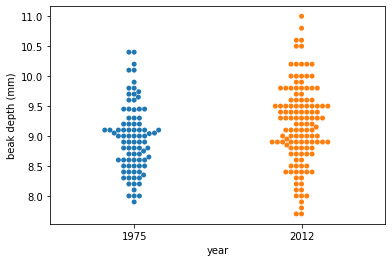

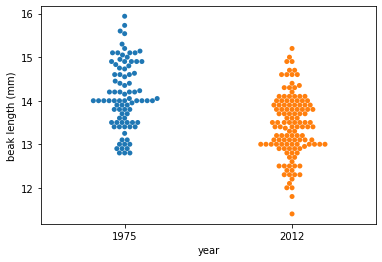

In [5]:
# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=df2)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_length', data=df2)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak length (mm)')

# Show the plot
plt.show()

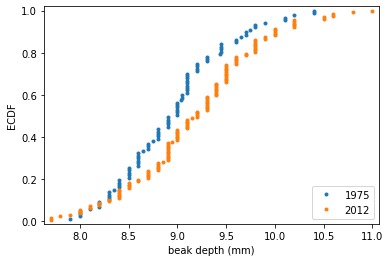

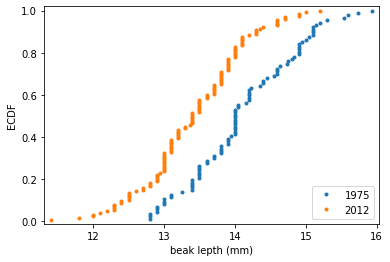

In [6]:
import utils.utils

bd_1975 = df2[df2['year'] == 1975]['beak_depth']
bd_2012 = df2[df2['year'] == 2012]['beak_depth']

bl_1975 = df2[df2['year'] == 1975]['beak_length']
bl_2012 = df2[df2['year'] == 2012]['beak_length']

# Compute ECDFs
x_1975, y_1975 = utils.utils.ecdf(bd_1975)
x_2012, y_2012 = utils.utils.ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

# Compute ECDFs
x_1975, y_1975 = utils.utils.ecdf(bl_1975)
x_2012, y_2012 = utils.utils.ecdf(bl_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak lepth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [7]:
print(type(bl_1975))

<class 'pandas.core.series.Series'>


In [8]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
mean_diff = utils.utils.diff_of_means(bd_2012, bd_1975)
#mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = utils.utils.draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = utils.utils.draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [0.25, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [-0.0060867   0.39359399] mm


#Hypothesis test
>* The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.
>* If the hypothesis we are testing is  that the beak depths come from the same distribution, we could use a permutation test.

In [9]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975)
bd_2012_shifted = bd_2012 - np.mean(bd_2012)

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = utils.utils.draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = utils.utils.draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p = %.6f' %p)

p = 0.003700


#Hypothesis test on Pearson correlation
>* permute the one variables but leave the other values fixed
>* This simulates the hypothesis that they are totally independent of each other. 
>* For each permutation, compute the Pearson correlation coefficient.
>* Assess how many permutation replicates have a Pearson correlation coefficient greater than the observed one --> P value


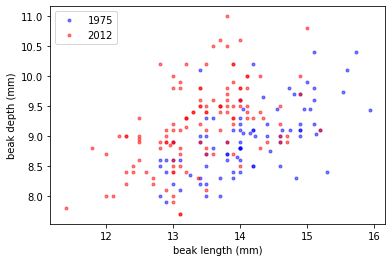

In [10]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)


# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [11]:
# Compute observed correlation: r_obs
r_obs = utils.utils.pearson_r(bd_1975, bl_1975)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    bd_1975_permuted = np.random.permutation(bd_1975)

    # Compute Pearson correlation
    perm_replicates[i] = utils.utils.pearson_r(bd_1975_permuted, bl_1975)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs) /len(perm_replicates)
print('Observed r = %.2f,' %r_obs, 'p-val = %.6f'  %p)

Observed r = 0.62, p-val = 0.000000


In [12]:
# Compute observed correlation: r_obs
r_obs = utils.utils.pearson_r(bd_2012, bl_2012)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    bd_1975_permuted = np.random.permutation(bd_2012)

    # Compute Pearson correlation
    perm_replicates[i] = utils.utils.pearson_r(bd_1975_permuted, bl_2012)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs) /len(perm_replicates)
print('Observed r = %.2f,' %r_obs, 'p-val = %.6f'  %p)

Observed r = 0.50, p-val = 0.000000


#Linear Regression
>* Perform pairs bootstrap estimates for the regression parameters.

In [13]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, deg=1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, deg=1)

# Perform pairs bootstrap for the linear regressions
bl_1975_ = bl_1975.to_numpy()
bd_1975_ = bd_1975.to_numpy()
bl_2012_ = bl_2012.to_numpy()
bd_2012_ = bd_2012.to_numpy()
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        utils.utils.draw_bs_pairs_linreg(bl_1975_, bd_1975_, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        utils.utils.draw_bs_pairs_linreg(bl_2012_, bd_2012_, size=1000)
# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

87
1975: slope = 0.4652051691605937 conf int = [0.33400185 0.58143604]
1975: intercept = 2.3908752365842263 conf int = [0.75113759 4.28283418]
2012: slope = 0.462630358835313 conf int = [0.33002793 0.60415623]
2012: intercept = 2.9772474982360198 conf int = [1.13297036 4.71637982]
